 #  cat and dog classification algorithms
 
*  image classification 
*  Dataset: https://www.kaggle.com/arpitjain007/dog-vs-cat-fastai

* data set contains Two files name as cat and dog there around 12500 images of cats and 12500 images of dogs.
* creating a model for recognization of the image is cat or dog
* RGB (3 chanals red, blue, green having each higth and width hence each chanel called as matrics.)


## Data preprocessing part

In [1]:
                                # importing the required libraries

import numpy as np
import cv2                      # pip insatll opencv-python
import os
import random
import matplotlib.pyplot as plt
import pickle

In [2]:
DIRECTORY = r'D:\data study\data\catdogdataset'   # row path of the data where present
CATEGORIES = ['cats','dogs']                      # the data folders with contains many images of cats and dogs in that

In [3]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY,category)       # joing the path of two datasets where both data present in diffnt folder 
    print(path)                                   # prints the paths of data folders (program contineous..)

D:\data study\data\catdogdataset\cats
D:\data study\data\catdogdataset\dogs


In [4]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY,category)
   
    for img in os.listdir(path):
        img_path = os.path.join(path, img)      # connect and reads the image files .jpg from both foldes (program contineous..)
        print(img_path)
        break                                     # finish task for only 1 image
        


D:\data study\data\catdogdataset\cats\cat.1.jpg
D:\data study\data\catdogdataset\dogs\dog.0.jpg


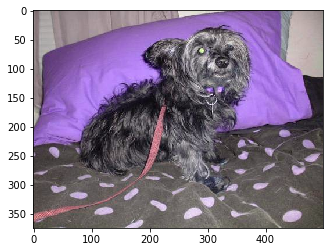

In [5]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY ,category)
   
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)
        plt.imshow(arr)
        break                    # fish task for only 1st image
       #  all images are in diffrent size and shape so need to resize () (program contineous..)


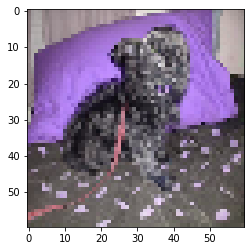

In [6]:
#  assigning the size of image( 100 is the value of resulution can change accordingly)
#  Less image size, is increase the computational speed but more less value is bad for model 

img_size = 60              

for category in CATEGORIES:
    path = os.path.join(DIRECTORY ,category)
   
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr  = cv2.imread(img_path)
        new_arr = cv2.resize(arr,(img_size, img_size) ) # reshaping the pic size and storing in back to img_arry
        plt.imshow(new_arr)
        break

In [7]:
# need to give a label to need make understand for model 

img_size = 60 

# need to give a label to need make understand for model 
data = []

for category in CATEGORIES:
    path= os.path.join(DIRECTORY ,category)
    label =  CATEGORIES.index(category)
   
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr , (img_size, img_size) ) # reshaping the pic size and storing in back to img_arry
        data.append ([ new_arr, label])                        # appending the value of label data in a data list
        

In [8]:
len (data)              # see the length of labeled data size

23000

In [9]:
random.shuffle(data)   # suffle the data two mix the both cat and dog data 

In [10]:
data[0]   # categories=['cats','dogs'] at o/p [210, 220, 233]]], dtype=uint8),0] this last zero indicates that value of cat

[array([[52, 66, 69, ..., 25, 10, 13],
        [63, 73, 73, ..., 24, 12, 12],
        [58, 69, 45, ..., 23, 13, 13],
        ...,
        [25, 34, 41, ..., 65, 30, 40],
        [35, 33, 34, ..., 41, 41, 35],
        [28, 29, 35, ..., 44, 31, 27]], dtype=uint8),
 1]

In [11]:
x = []   # all featues in x list
y = []  # all labes in y list

for features , labels in data:
    x.append(features)
    y.append(labels)


In [12]:
# covert x and data into arry using numpy
x = np.array(x)
y = np.array(y)

In [13]:
print(len(x))
print(len(y))  # both data's are perfectly matching each other.

23000
23000


In [14]:
x

array([[[ 52,  66,  69, ...,  25,  10,  13],
        [ 63,  73,  73, ...,  24,  12,  12],
        [ 58,  69,  45, ...,  23,  13,  13],
        ...,
        [ 25,  34,  41, ...,  65,  30,  40],
        [ 35,  33,  34, ...,  41,  41,  35],
        [ 28,  29,  35, ...,  44,  31,  27]],

       [[172, 171, 168, ..., 125, 119, 119],
        [168, 172, 174, ..., 123, 124, 121],
        [176, 175, 175, ..., 129, 126, 121],
        ...,
        [157, 161, 157, ..., 163, 161, 158],
        [160, 163, 162, ..., 164, 162, 158],
        [160, 163, 161, ..., 166, 162, 159]],

       [[250, 252, 253, ..., 255, 255, 255],
        [253, 253, 253, ..., 255, 255, 255],
        [253, 253, 251, ..., 255, 255, 255],
        ...,
        [149, 161, 121, ..., 116, 138, 191],
        [145, 153, 168, ..., 147, 149, 189],
        [120, 166, 128, ..., 152, 150, 188]],

       ...,

       [[190, 190, 190, ..., 122, 111, 113],
        [191, 190, 191, ..., 129, 129, 115],
        [196, 193, 196, ..., 121, 111, 121

In [15]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [16]:
# now convert this data into pickle form
pickle.dump(x, open('x.pk1', 'wb'))
pickle.dump(y, open('y.pk2', 'wb'))